In [1]:
import pandas as pd 
import numpy as np 


In [4]:
df = pd.read_csv('Train.csv')

In [7]:
#print all the columns in loop 
for col in df.columns:
    print(col)

id
site_id
site_latitude
site_longitude
city
country
date
hour
sulphurdioxide_so2_column_number_density
sulphurdioxide_so2_column_number_density_amf
sulphurdioxide_so2_slant_column_number_density
sulphurdioxide_cloud_fraction
sulphurdioxide_sensor_azimuth_angle
sulphurdioxide_sensor_zenith_angle
sulphurdioxide_solar_azimuth_angle
sulphurdioxide_solar_zenith_angle
sulphurdioxide_so2_column_number_density_15km
month
carbonmonoxide_co_column_number_density
carbonmonoxide_h2o_column_number_density
carbonmonoxide_cloud_height
carbonmonoxide_sensor_altitude
carbonmonoxide_sensor_azimuth_angle
carbonmonoxide_sensor_zenith_angle
carbonmonoxide_solar_azimuth_angle
carbonmonoxide_solar_zenith_angle
nitrogendioxide_no2_column_number_density
nitrogendioxide_tropospheric_no2_column_number_density
nitrogendioxide_stratospheric_no2_column_number_density
nitrogendioxide_no2_slant_column_number_density
nitrogendioxide_tropopause_pressure
nitrogendioxide_absorbing_aerosol_index
nitrogendioxide_cloud_fra

In [9]:
df.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [10]:
#do label encoding for the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [11]:
df.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,7055,56,6.53257,3.39936,2,2,253,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,2609,56,6.53257,3.39936,2,2,258,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,5581,56,6.53257,3.39936,2,2,259,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,2107,56,6.53257,3.39936,2,2,261,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,2405,56,6.53257,3.39936,2,2,262,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


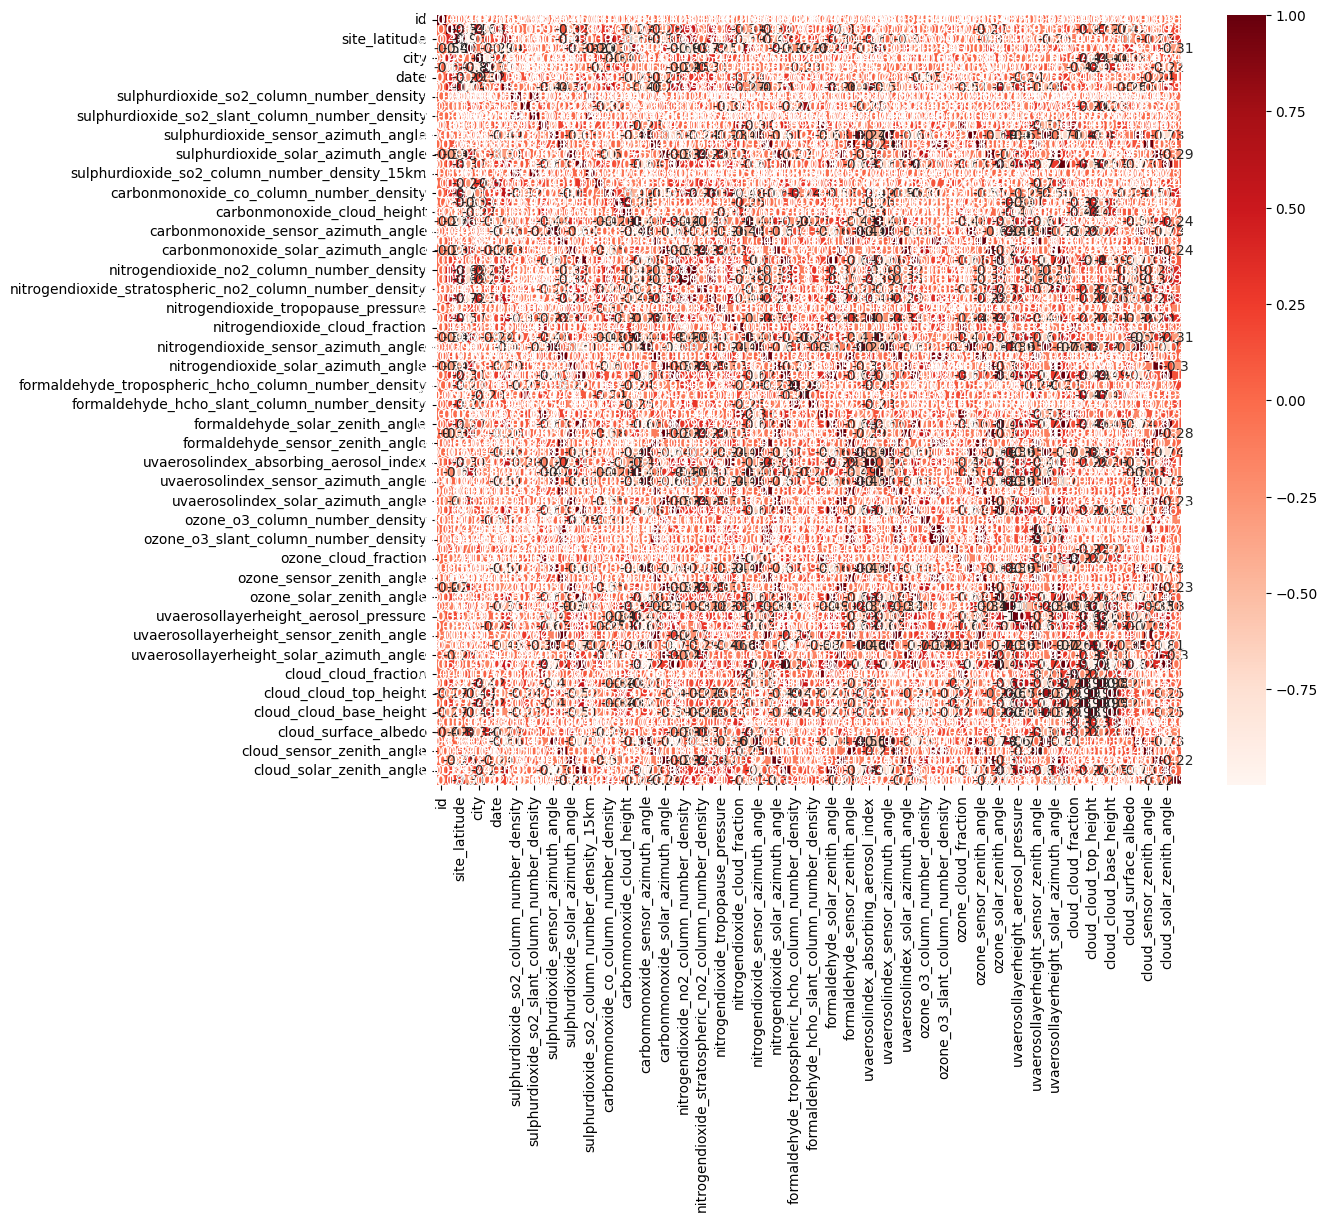

In [12]:
#make a correlation matrix graph 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
#use the top 10 features which are related to pm2_5
cor_target = abs(cor["pm2_5"])
#it should not include the pm2_5 column
relevant_features = cor_target[cor_target>0.25]
#remove pm2_5 column
relevant_features = relevant_features.drop('pm2_5')

(relevant_features)

site_latitude                                             0.288082
site_longitude                                            0.305682
sulphurdioxide_solar_azimuth_angle                        0.285822
carbonmonoxide_co_column_number_density                   0.422418
nitrogendioxide_no2_column_number_density                 0.398677
nitrogendioxide_tropospheric_no2_column_number_density    0.403459
nitrogendioxide_no2_slant_column_number_density           0.395134
nitrogendioxide_absorbing_aerosol_index                   0.327197
nitrogendioxide_sensor_altitude                           0.309554
nitrogendioxide_solar_azimuth_angle                       0.295749
formaldehyde_solar_azimuth_angle                          0.277867
uvaerosollayerheight_solar_azimuth_angle                  0.297579
Name: pm2_5, dtype: float64

In [28]:
#now we will use these features to train the model except the target column itself 
X = relevant_features.index
X
#now we will use these features to train the model except the target column itself
X = df[X]

#fill the nan values with the mean of the column
X = X.fillna(X.mean())


In [29]:
y = df['pm2_5']
y = y.fillna(y.mean())

#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
#predict the values
y_pred = model.predict(X_test)

#check the accuracy of the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

520.3457382721278


In [37]:
#use regressor 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

#use this on the test dataset 
df = pd.read_csv('Test.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        
X = df[relevant_features.index]
X = X.fillna(X.mean())
y_pred = model.predict(X)

#save in a csv file with format of id	pm2_5
df = pd.read_csv('Test.csv')
df['pm2_5'] = y_pred
df = df[['id', 'pm2_5']]
df.to_csv('submission.csv', index=False)


477.5174720415746


In [34]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100


c:\Users\SARVESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 33964.3828
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2603.0803
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3790.2683
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3801.0334
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3667.1667
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2752.8894
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2944.3594
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3253.9060
Epoch 9/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3150.6995
Epoch 10/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2873.2883
Epoch 11/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3566.7002
Epoch 12/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4133.2363
Epoch 13/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4415.1113
Epoch 14/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1633.0275
Epoch 15/100

In [35]:
#predict the values
y_pred = model.predict(X_test)

#check the accuracy of the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
615.4474650687392


In [40]:
#now use catboost 
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor()
model_cat.fit(X_train, y_train)

y_pred = model_cat.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

Learning rate set to 0.054974
0:	learn: 24.3849940	total: 3.58ms	remaining: 3.58s
1:	learn: 23.9001084	total: 8.55ms	remaining: 4.27s
2:	learn: 23.4391470	total: 13.5ms	remaining: 4.49s
3:	learn: 23.0404558	total: 16.7ms	remaining: 4.15s
4:	learn: 22.6608645	total: 19.8ms	remaining: 3.94s
5:	learn: 22.2925052	total: 24.5ms	remaining: 4.07s
6:	learn: 21.9623971	total: 27.9ms	remaining: 3.95s
7:	learn: 21.8269679	total: 31.9ms	remaining: 3.96s
8:	learn: 21.5395447	total: 35.2ms	remaining: 3.88s
9:	learn: 21.2250594	total: 38.1ms	remaining: 3.77s
10:	learn: 20.9376894	total: 43.5ms	remaining: 3.91s
11:	learn: 20.8285184	total: 47.1ms	remaining: 3.88s
12:	learn: 20.5791130	total: 50.7ms	remaining: 3.85s
13:	learn: 20.3594503	total: 54.8ms	remaining: 3.86s
14:	learn: 20.2614464	total: 57.8ms	remaining: 3.8s
15:	learn: 20.0463570	total: 62.5ms	remaining: 3.84s
16:	learn: 19.8408129	total: 69.1ms	remaining: 3.99s
17:	learn: 19.6705009	total: 112ms	remaining: 6.11s
18:	learn: 19.6086259	total:

In [42]:
#now use this on the test dataset
df_test = pd.read_csv('Test.csv')
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])
        
X = df_test[relevant_features.index]
X = X.fillna(X.mean())

y_pred_cat = model_cat.predict(X)
df_test = pd.read_csv('Test.csv')
df_test['pm2_5'] = y_pred_cat
df_test = df_test[['id', 'pm2_5']]
df_test.to_csv('submission_catboost.csv', index=False)

In [ ]:
#Missing entries for IDs id_67vafahcsb, id_qgc87e79ko, id_tce3ozp394, id_ykfovbo3gm, and id_27ono5yevj
#fix this 
df_test = pd.read_csv('Test.csv')
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])
        
X = df_test[relevant_features.index]
X = X.fillna(X.mean())



In [43]:
#use xgboost 
from xgboost import XGBRegressor
model_xgb = XGBRegressor()  
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

568.6797099769068


In [52]:
#use lightgbm
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor()

model_lgbm.fit(X_train, y_train)
y_pred = model_lgbm.predict(X_test)

mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2493
[LightGBM] [Info] Number of data points in the train set: 6456, number of used features: 12
[LightGBM] [Info] Start training from score 24.626701
393.0328912004446


In [53]:
#use this on the test dataset
df_test = pd.read_csv('Test.csv')
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])
        
X = df_test[relevant_features.index]
X = X.fillna(X.mean())

y_pred_lgbm = model_lgbm.predict(X)
df_test = pd.read_csv('Test.csv')
df_test['pm2_5'] = y_pred_lgbm
df_test = df_test[['id', 'pm2_5']]
df_test.to_csv('submission_lgbm.csv', index=False)

In [46]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

#use this on the test dataset
df_test = pd.read_csv('Test.csv')
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])

X = df_test[relevant_features.index]
X = X.fillna(X.mean())

y_pred = model.predict(X)
df_test = pd.read_csv('Test.csv')
df_test['pm2_5'] = y_pred
df_test = df_test[['id', 'pm2_5']]
df_test.to_csv('submission_linear.csv', index=False)

520.3457382721278


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [55]:
df = pd.read_csv('Train.csv')

# Label encoding for categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Correlation matrix
cor = df.corr()
cor_target = abs(cor["pm2_5"])
relevant_features = cor_target[cor_target > 0.25].drop('pm2_5')

# Prepare features and target
X = df[relevant_features.index]
X = X.fillna(X.mean())
y = df['pm2_5'].fillna(y.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Hyperparameter Tuning for LightGBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
}

In [56]:
model_lgbm = LGBMRegressor()
grid_search = GridSearchCV(model_lgbm, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_poly, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19053
[LightGBM] [Info] Number of data points in the train set: 5164, number of used features: 78
[LightGBM] [Info] Start training from score 24.739368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19061
[LightGBM] [Info] Number of data points in the train set: 5165, number of used features: 78
[LightGBM] [Info] Start training from score 24.470407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19059
[LightGBM] [Info] Number of data points in the train se

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [60]:
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

ensemble = VotingRegressor([('lgbm', best_model)])
ensemble.fit(X_poly, y_train)

y_pred_ensemble = ensemble.predict(X_poly_test)

# Evaluate the model
final_mse = mean_squared_error(y_test, y_pred_ensemble)
print(f"Improved MSE: {final_mse}")

# Predictions on Test Dataset


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19085
[LightGBM] [Info] Number of data points in the train set: 6456, number of used features: 78
[LightGBM] [Info] Start training from score 24.626701
Improved MSE: 402.646707505475


In [61]:
df_test = pd.read_csv('Test.csv')
for col in df_test.columns:
    #dont le the id column 
    if df_test[col].dtype == 'object' and col != 'id':
        df_test[col] = le.fit_transform(df_test[col])
    

X_test_final = df_test[relevant_features.index]
X_test_final = X_test_final.fillna(X_test_final.mean())
X_test_final_poly = poly.transform(X_test_final)

y_pred_final = ensemble.predict(X_test_final_poly)

# Save predictions to CSV
df_test['pm2_5'] = y_pred_final
df_test = df_test[['id', 'pm2_5']]
df_test.to_csv('submission_ensemble.csv', index=False)